In [1]:
import pandas as pd
import string as st
import math
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os.path as op
import pyaudio
from pydub import AudioSegment
from pydub.generators import Sine
from pydub.playback import play

In [6]:
data= pd.read_csv("~/Desktop/199_deSa/OpenBCI_test_data.csv")

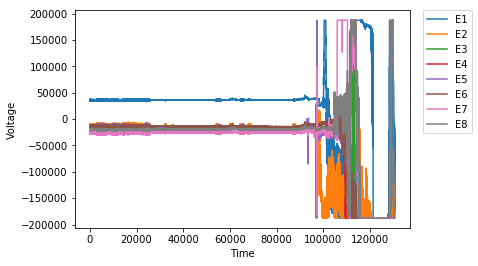

In [9]:
plt.xlabel('Time')
plt.ylabel('Voltage')
df1_voltage = data[['E1', 'E2','E3','E4','E5','E6','E7','E8']]
plt.plot(range(len(df1_voltage[0:250])), df1_voltage[[0:250]])
plt.legend(('E1', 'E2', 'E3', 'E4', 'E5', 'E6','E7','E8'),bbox_to_anchor=(1.04,1), borderaxespad=0)

In [6]:
mean_1=np.sum(data.E1)/len(data.E1)
mean_2=np.sum(data.E2)/len(data.E2)
mean_3=np.sum(data.E3)/len(data.E3)
mean_4=np.sum(data.E4)/len(data.E4)
mean_5=np.sum(data.E5)/len(data.E5)
mean_6=np.sum(data.E6)/len(data.E6)
mean_7=np.sum(data.E7)/len(data.E7)

In [7]:
E1sound=[]
for i in range(len(data.E1)):
    E1sound.append(data.E1[i]-mean_1)
    

In [8]:
E2sound=[]
for i in range(len(data.E2)):
    E2sound.append(data.E2[i]-mean_2)

In [9]:
E3sound=[]
for i in range(len(data.E3)):
    E3sound.append(data.E3[i]-mean_3)

In [10]:
E4sound=[]
for i in range(len(data.E4)):
    E4sound.append(data.E4[i]-mean_4)

In [11]:
E5sound=[]
for i in range(len(data.E5)):
    E5sound.append(data.E5[i]-mean_5)

In [12]:
E6sound=[]
for i in range(len(data.E6)):
    E6sound.append(data.E6[i]-mean_6)

In [13]:
E7sound=[]
for i in range(len(data.E7)):
    E7sound.append(data.E1[i]-mean_7)

In [14]:
norm_eeg=pd.DataFrame([E1sound,E2sound,E3sound,E4sound,E5sound,E6sound])
norm_eeg=norm_eeg.transpose()
norm_eeg.rename(columns={0: "E1", 1:"E2",2:"E3",3:"E4",4:"E5",5:"E6"}, inplace=True)


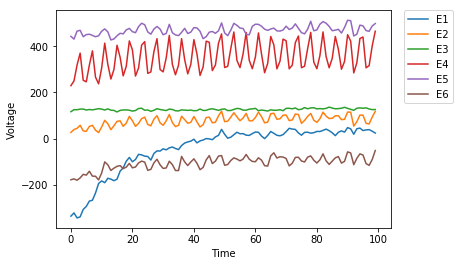

In [16]:
plt.xlabel('Time')
plt.ylabel('Voltage')
df1_voltage = norm_eeg[['E1', 'E2','E3','E4','E5','E6']]
plt.plot(range(len(norm_eeg[0:100])), norm_eeg[0:100])
plt.legend(('E1', 'E2', 'E3', 'E4', 'E5', 'E6'),bbox_to_anchor=(1.04,1), borderaxespad=0)

In [17]:
#everything below is for sound

In [18]:
num_samples = 15000

myList=E1sound
abs_E1sound=[abs(number) for number in myList]
abs_E1sound=abs_E1sound[:num_samples]
myList_2=E2sound
abs_E2sound=[abs(number) for number in myList_2]
abs_E2sound=abs_E2sound[:num_samples]
myList_3=E3sound
abs_E3sound=[abs(number) for number in myList_3]
abs_E3sound=abs_E3sound[:num_samples]
myList_4=E4sound
abs_E4sound=[abs(number) for number in myList_4]
abs_E4sound=abs_E4sound[:num_samples]
myList_5=E5sound
abs_E5sound=[abs(number) for number in myList_5]
abs_E5sound=abs_E5sound[:num_samples]
myList_6=E6sound
abs_E6sound=[abs(number) for number in myList_6]
abs_E6sound=abs_E6sound[:num_samples]


In [19]:
#added 135 because that was the lowest playable noise through the computer
for i in range(len(abs_E1sound)):
    abs_E1sound[i]=abs_E1sound[i] + 135
    #print(abs_E1sound[i])

In [20]:
#added 135 because that was the lowest playable noise through the computer
for i in range(len(abs_E2sound)):
    abs_E2sound[i]=abs_E2sound[i] + 135
    #print(abs_E2sound[i])

In [21]:
#added 135 because that was the lowest playable noise through the computer
for i in range(len(abs_E3sound)):
    abs_E3sound[i]=abs_E3sound[i] + 135
    #print(abs_E3sound[i])

In [22]:
#added 135 because that was the lowest playable noise through the computer
for i in range(len(abs_E4sound)):
    abs_E4sound[i]=abs_E4sound[i] + 135
    #print(abs_E4sound[i])

In [23]:
#added 135 because that was the lowest playable noise through the computer
for i in range(len(abs_E5sound)):
    abs_E5sound[i]=abs_E5sound[i] + 135
    #print(abs_E5sound[i])

In [24]:
#added 135 because that was the lowest playable noise through the computer
for i in range(len(abs_E6sound)):
    abs_E6sound[i]=abs_E6sound[i] + 135
    #print(abs_E6sound[i])

In [25]:
E1_avg=[]
E2_avg=[]
E3_avg=[]
E4_avg=[]
E5_avg=[]
E6_avg=[]
i=0;
while i < len(abs_E1sound):
    E1_avg.append(np.sum(abs_E1sound[i:250+i])/250);
    E2_avg.append(np.sum(abs_E2sound[i:250+i])/250);
    E3_avg.append(np.sum(abs_E3sound[i:250+i])/250);
    E4_avg.append(np.sum(abs_E4sound[i:250+i])/250);
    E5_avg.append(np.sum(abs_E5sound[i:250+i])/250);
    E6_avg.append(np.sum(abs_E6sound[i:250+i])/250);
    i = i+250;

In [26]:
tone1=Sine(abs_E1sound[1]).to_audio_segment(duration=250)
tone2=Sine(abs_E1sound[1]).to_audio_segment(duration=250)
tone3=Sine(abs_E1sound[1]).to_audio_segment(duration=250)
tone4=Sine(abs_E1sound[1]).to_audio_segment(duration=250)
tone5=Sine(abs_E1sound[1]).to_audio_segment(duration=250)
tone6=Sine(abs_E1sound[1]).to_audio_segment(duration=250)
for i in range(len(E1_avg)):
    tone1=tone1.append(Sine(E1_avg[i]).to_audio_segment(duration=1000))
    tone2=tone2.append(Sine(E2_avg[i]).to_audio_segment(duration=1000))
    tone3=tone3.append(Sine(E3_avg[i]).to_audio_segment(duration=1000))
    tone4=tone4.append(Sine(E4_avg[i]).to_audio_segment(duration=1000))
    tone5=tone5.append(Sine(E5_avg[i]).to_audio_segment(duration=1000))
    tone6=tone6.append(Sine(E6_avg[i]).to_audio_segment(duration=1000))
    

In [27]:
sound_df=pd.DataFrame([abs_E1sound,abs_E2sound,abs_E3sound,abs_E4sound,abs_E5sound,abs_E6sound])
sound_df=sound_df.transpose()
sound_df.rename(columns={0: "E1", 1:"E2",2:"E3",3:"E4",4:"E5",5:"E6"}, inplace=True)
#sound_df

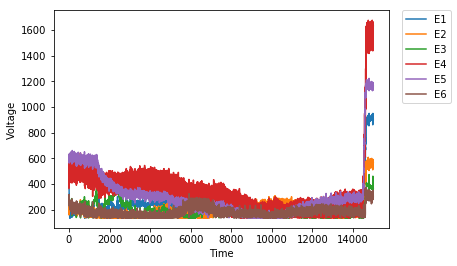

In [30]:
plt.xlabel('Time')
plt.ylabel('Voltage')
df1_voltage = sound_df[['E1', 'E2','E3','E4','E5','E6']]
plt.plot(range(len(df1_voltage)), df1_voltage)
plt.legend(('E1', 'E2', 'E3', 'E4', 'E5', 'E6'),bbox_to_anchor=(1.04,1), borderaxespad=0)

In [33]:
# FFTs

In [34]:
ft_1=np.fft.fft(list(E1sound),128)
ft_2=np.fft.fft(list(E2sound),128)
ft_3=np.fft.fft(list(E3sound),128)
ft_4=np.fft.fft(list(E4sound),128)
ft_5=np.fft.fft(list(E5sound),128)
ft_6=np.fft.fft(list(E6sound),128)
ft_7=np.fft.fft(list(E7sound),128)

In [35]:
w_1=[]#fft result
for f in ft_1:
    w_1.append(abs(f**2))
    

In [36]:
w_2=[]#fft result
for f in ft_2:
    w_2.append(abs(f**2))
    

In [37]:
w_3=[]#fft result
for f in ft_3:
    w_3.append(abs(f**2))
    

In [38]:
w_4=[]#fft result
for f in ft_4:
    w_4.append(abs(f**2))

In [39]:
w_5=[]#fft result
for f in ft_5:
    w_5.append(abs(f**2))

In [40]:
w_6=[]#fft result
for f in ft_6:
    w_6.append(abs(f**2))

In [41]:
w_7=[]#fft result
for f in ft_7:
    w_7.append(abs(f**2))

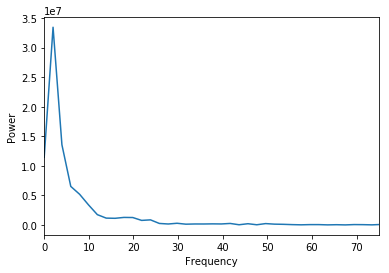

In [42]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_1)/2.0))
plt.plot(freq,w_1[:math.ceil(len(w_1)/2.0)])
plt.xlim(0,75)
plt.xlabel('Frequency')
plt.ylabel('Power')

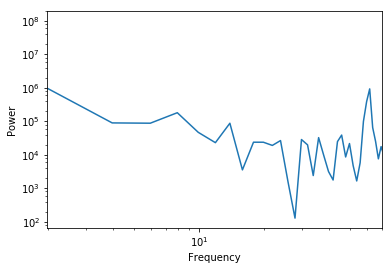

In [43]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_2)/2.0))
plt.loglog(freq,w_2[:math.ceil(len(w_2)/2.0)])
plt.xlim(0,70)
plt.xlabel('Frequency')
plt.ylabel('Power')

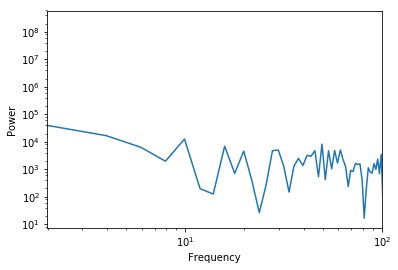

In [44]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_3)/2.0))
plt.loglog(freq,w_3[:math.ceil(len(w_3)/2.0)])
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Power')

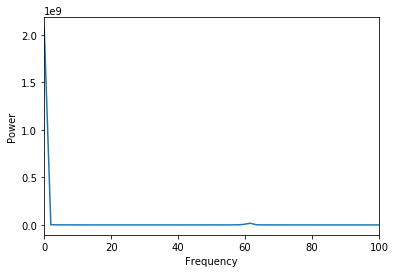

In [45]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_4)/2.0))
plt.plot(freq,w_4[:math.ceil(len(w_4)/2.0)])
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Power')

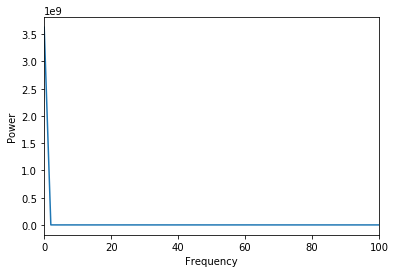

In [46]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_5)/2.0))
plt.plot(freq,w_5[:math.ceil(len(w_5)/2.0)])
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Power')

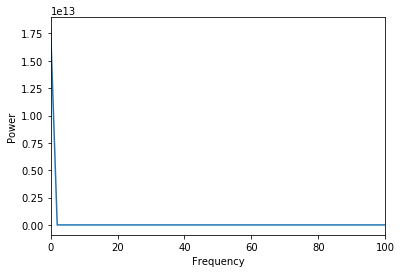

In [47]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_7)/2.0))
plt.plot(freq,w_7[:math.ceil(len(w_7)/2.0)])
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Power')

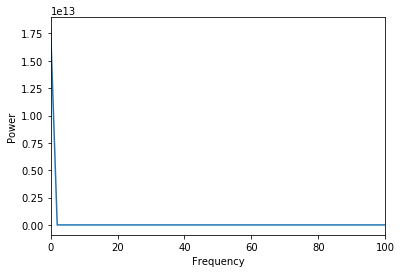

In [48]:
sample_rate=100000/400.0#sample rate will stay the same for all the electrodes
freq = np.linspace(0,sample_rate/2,math.ceil(len(w_7)/2.0))
plt.plot(freq,w_7[:math.ceil(len(w_7)/2.0)])
plt.xlim(0,100)
plt.xlabel('Frequency')
plt.ylabel('Power')

In [ ]:
p = pyaudio.PyAudio()

volume = 0.5# range [0.0, 1.0]
fs = 44100# sampling rate, Hz, must be integer
duration = 1.0# in seconds, may be float
f = 261.63# sine frequency, Hz, may be float


# generate samples, note conversion to float32 array
for i in range(len(abs_E1sound)):
    samples = (np.sin(2*np.pi*np.arange(fs*duration)*abs_E1sound[i]/fs)).astype(np.float32)
    
    samples_2 = (np.sin(2*np.pi*np.arange(fs*duration)*abs_E2sound[i]/fs)).astype(np.float32)
    samples_3 = (np.sin(2*np.pi*np.arange(fs*duration)*abs_E3sound[i]/fs)).astype(np.float32)
    samples_4 = (np.sin(2*np.pi*np.arange(fs*duration)*abs_E4sound[i]/fs)).astype(np.float32)
    samples_5 = (np.sin(2*np.pi*np.arange(fs*duration)*abs_E5sound[i]/fs)).astype(np.float32)
    samples_6 = (np.sin(2*np.pi*np.arange(fs*duration)*abs_E6sound[i]/fs)).astype(np.float32)
    print(abs_E1sound[i],abs_E2sound[i],abs_E3sound[i],abs_E4sound[i],abs_E5sound[i],abs_E6sound[i])
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)
    stream_2=stream.write(volume*samples)#+volume*samples_2+volume*samples_3+volume*samples_4+volume*samples_5+volume*samples_6)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,channels=1,rate=fs,output=True)

# play. May repeat with different volume values (if done interactively) 
#stream_2=stream.write(volume*samples)


stream.stop_stream()
stream.close()

p.terminate()

In [50]:
song = AudioSegment.from_mp3('tswift_del.mp3')
song=song[3000:63000]
tones_overlay=tone6.overlay(tone1).overlay(tone2).overlay(tone3).overlay(tone4).overlay(tone5)
# tones_overlay.export("tone_remix",format="mp3")

remix=AudioSegment.from_mp3('tone_remix')

remix_low=remix-15
t_re=remix_low.overlay(song)

#tones_overlay.export("tswift_toneremix_final",format="mp3")

#t_re.export("tswift_toneremix_final",format="mp3")


#tone4.export("tone4",format="mp3")

tones_overlay=tone6.overlay(tone1).overlay(tone2).overlay(tone3).overlay(tone4).overlay(tone5)
#play(tones_overlay)

multitone=tone6.overlay(tone1).overlay(tone2).overlay(tone3).overlay(tone4).overlay(tone5).overlay(song)
#play(multitone[:52300])

In [51]:
play(tone4)

KeyboardInterrupt: 

In [53]:
#cuts off before the loud high pitch ending
play(tones_overlay[:52300]-15)

KeyboardInterrupt: 

In [54]:
play(t_re[:52300])

KeyboardInterrupt: 